<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [8]:
from google.colab import files
import zipfile

# Upload ZIP
uploaded = files.upload()

# Extract
for filename in uploaded.keys():
    zip_path = "/content/" + filename
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")


Saving archive (5).zip to archive (5).zip


In [9]:
train_dir = "/content/"  # Change if needed
val_dir = "/content/"

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    seed=42
)


Found 35887 images belonging to 4 classes.
Found 35887 images belonging to 4 classes.


In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [14]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_data.num_classes, activation='softmax')
])

In [15]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
history = model.fit(
    train_data,
    validation_data=val_data,
    steps_per_epoch=10,      # 10 batches × 32 images = 320 images per epoch
    validation_steps=5,      # 5 batches for validation
    epochs=2                 # Train for only 2 epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.6374 - loss: 0.9153 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 263s 27s/step - accuracy: 0.6442 - loss: 0.9048 - val_accuracy: 0.6750 - val_loss: 0.6489
Epoch 2/2
10/10 ━━━━━━━━━━━━━━━━━━━━ 263s 27s/step - accuracy: 0.6336 - loss: 0.6583 - val_accuracy: 0.7312 - val_loss: 0.6841


In [17]:
loss, accuracy = model.evaluate(val_data, steps=5)
print(f"Validation Accuracy: {accuracy*100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 85s 17s/step - accuracy: 0.8365 - loss: 0.4612
Validation Accuracy: 83.75%


In [18]:
model.save("vgg16_fast_transfer_model.h5")
print("Model saved as vgg16_fast_transfer_model.h5")

Model saved as vgg16_fast_transfer_model.h5


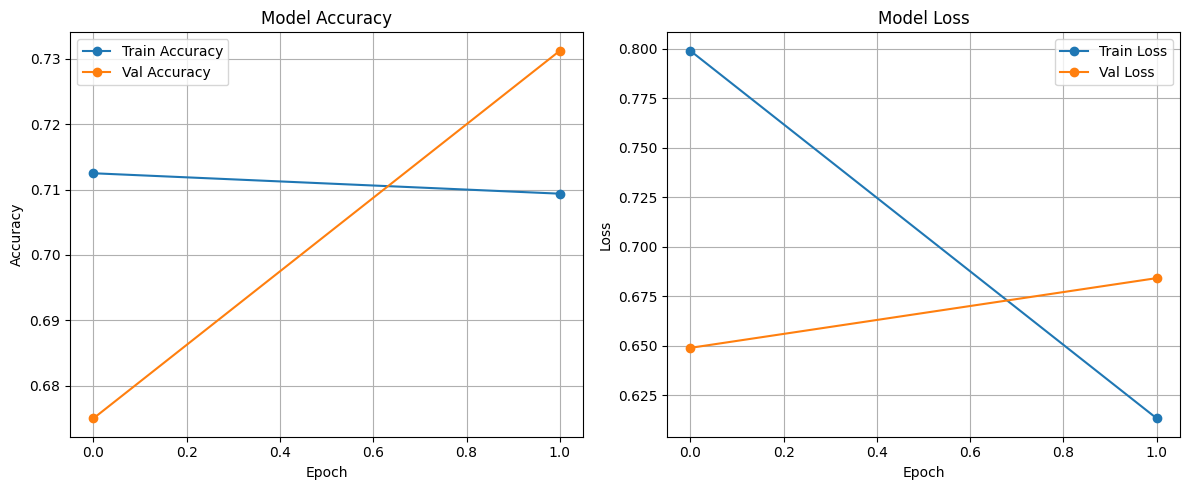

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
